# Use NAG Library for Python to cluster some random data using K-means

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from naginterfaces.library import mv
# Select the display backend for Jupyter:
%matplotlib inline

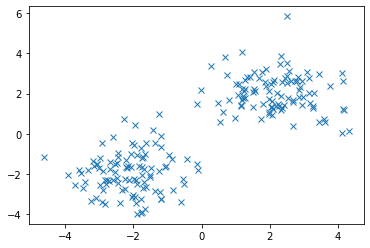

In [2]:
number_of_points = 100

# Generate a random array to try to cluster, have two variables so can plot it
np.random.seed(42) # For reproducibility

# Explicity construct two nicely separated clusters for ease of demonstration
mean1 = [-2, -2]
cov1 = [[1, 0], [0, 1]]  
X1 = np.random.multivariate_normal(mean1, cov1, number_of_points)

mean2 = [2, 2]
cov2 = [[1, 0], [0, 1]]  
X2 = np.random.multivariate_normal(mean2, cov2, number_of_points)

# Join the two together to make a single set of points
X = np.concatenate((X1, X2))

# Plot the combined dataset
_ = plt.plot(X[:,0], X[:,1], 'x')

In [3]:
nvar = 2 # Number of clusters
cmeans = np.random.rand(2, nvar) # Initial starting guesses for the centres
isx = np.full(2, 1.0, dtype=int) # We want to include both x and y features in the clustering
kmeans = mv.cluster_kmeans(X, isx, cmeans) # Find the cluster centres

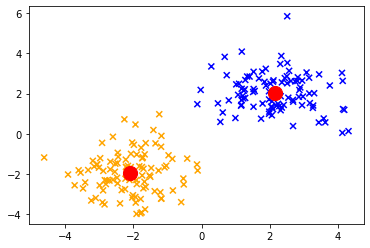

In [4]:
colours = ['orange', 'blue']
plt.scatter(X[:,0], X[:,1], marker='x', c=kmeans.inc, cmap=matplotlib.colors.ListedColormap(colours))
_ = plt.scatter(kmeans.cmeans[:,0], kmeans.cmeans[:,1], color='red', s=200)